In [1]:
import os
import pickle
import glob
import skimage
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def get_data(data_dir, sample_start=0, sample_end=200):
    fnames = list(sorted(glob.glob(os.path.join(data_dir, "*.pkl"))))
    
    print('Found %s records' % len(fnames))
    # Load into a list of tuples of xmin, xmax, y, data
    data = []
    XMIN, XMAX = None, None
    for fname in fnames:
        with open(fname, 'rb') as f:
            fft_data = pickle.load(f)

        # Isolate the frequency. In our case, 28kHz is usually around sample 8000 to 10000
        
        try:
            amplitudes = fft_data[:, sample_start:sample_end]
        except IndexError:
            print("indexerror for file %s" % fname)
            print('Diagonstics on the length of each sample:')
            lengths = [len(arr) for arr in fft_data]
            correct_length = min(lengths)
            amplitudes = np.array([t[:correct_length] for t in fft_data]) 
            
            
        name = os.path.basename(fname).replace('.pkl', '').replace('continuous_', '')
        coords = [float(coord) for coord in name.split('_')]
        xmin, xmax, y = coords
        XMIN = xmin
        XMAX = xmax
        data.append((xmin, xmax, y, amplitudes))
        
    # Sort by y coordinate (xmin and xmax are expected to be the same for all)
    data = list(sorted(data))
    if not data:
        raise RuntimeError('No Data Found')
    
    return data

In [3]:
def get_maxes_and_freqs(samples):
    """Takes in a N by S array, where N is the number of samples and S is the
    dimensions of the FFT sample taken. We will get a list of maxes and the
    frequency they correspond to as two np arrays, so we can plot as a scatterplot"""
    maxes = samples.max(axis=1)
    idxs = samples.argmax(axis=1)
    return idxs, maxes

In [3]:
data = get_data('../data/1551236003')

Found 2601 records
indexerror for file ../data/1551236003/10.0_12.0_0.pkl
Diagonstics on the length of each sample:
indexerror for file ../data/1551236003/10.0_36.0_0.pkl
Diagonstics on the length of each sample:
indexerror for file ../data/1551236003/22.0_18.0_0.pkl
Diagonstics on the length of each sample:
indexerror for file ../data/1551236003/30.0_48.0_0.pkl
Diagonstics on the length of each sample:
indexerror for file ../data/1551236003/40.0_16.0_0.pkl
Diagonstics on the length of each sample:
indexerror for file ../data/1551236003/60.0_2.0_0.pkl
Diagonstics on the length of each sample:
indexerror for file ../data/1551236003/60.0_24.0_0.pkl
Diagonstics on the length of each sample:
indexerror for file ../data/1551236003/8.0_56.0_0.pkl
Diagonstics on the length of each sample:
indexerror for file ../data/1551236003/84.0_40.0_0.pkl
Diagonstics on the length of each sample:
indexerror for file ../data/1551236003/90.0_4.0_0.pkl
Diagonstics on the length of each sample:


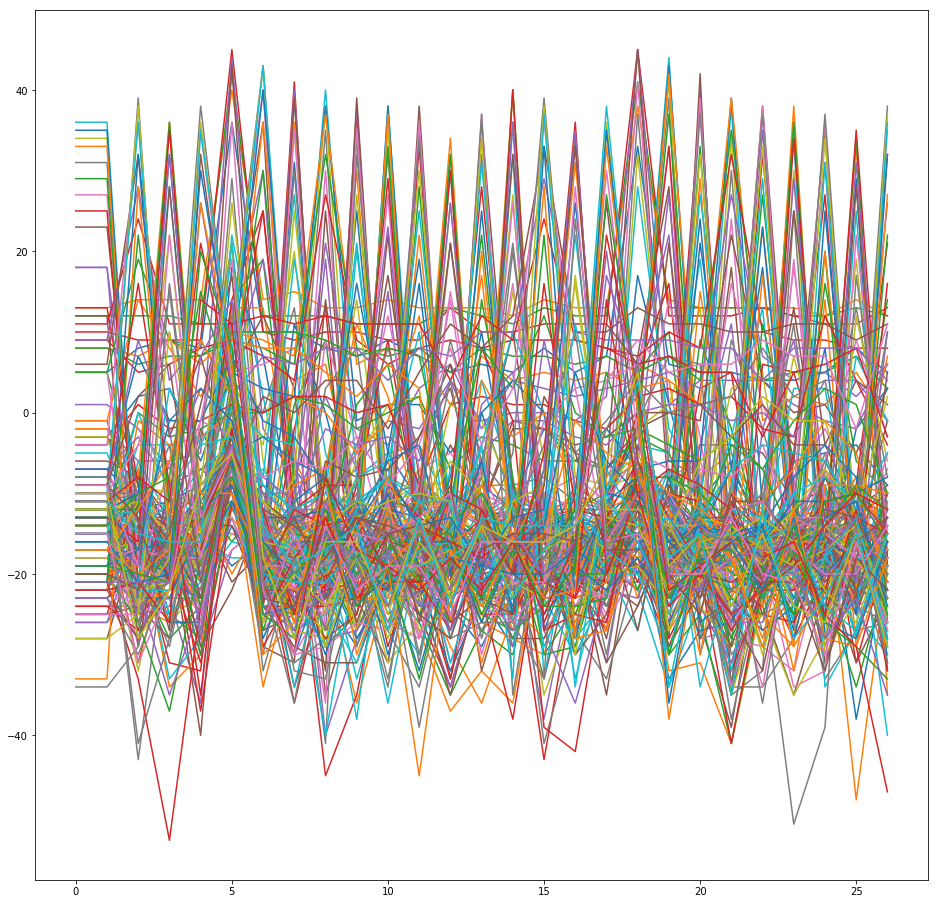

In [4]:
plt.figure(figsize=(16, 16))
plt.plot(data[0][-1])
plt.show()

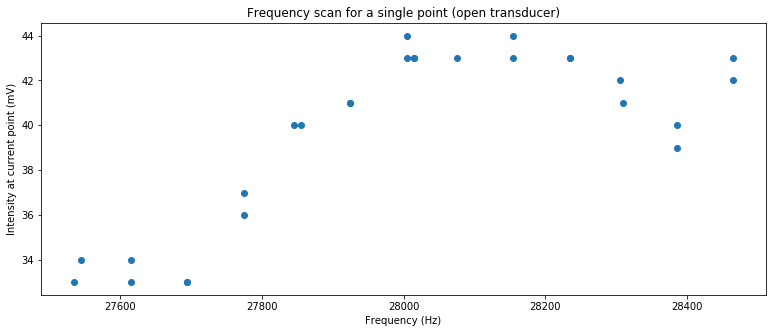

In [6]:
plt.figure(figsize=(13, 5))
x, y = get_maxes_and_freqs(data[11][-1])
plt.scatter(x * 5 + 27500, y)
plt.title("Frequency scan for a single point (open transducer)")
plt.ylabel('Intensity at current point (mV)')
plt.xlabel("Frequency (Hz)")
plt.show()

In [11]:
data = get_data('../data/1551385192')

Found 10201 records


In [12]:
len(data)

10201

In [13]:
# For each frequency bin, we can make an image of what values we have.
# otherwise, make that value -1 or something to show that we don't have info
WIDTH, HEIGHT = 101, 101
num_freqs = data[2][-1].shape[-1]
print(num_freqs)
image = np.zeros((num_freqs, WIDTH, HEIGHT))

for index, d in enumerate(data):
    idx, idy = int(index % WIDTH), int(index / WIDTH)
    freq_indices, max_amps = get_maxes_and_freqs(d[-1])
    image[freq_indices, idx, idy] = max_amps

41


In [24]:
# We can slightly process these images by adding in values from nearby bins.
# This may cause too much smearing, be careful with how much u do this!
nearby_smoothing = 2  # get data from 2 nearest and farthest
smoothed_image = image[:]
for idx, freq_slice in enumerate(image):
    start = np.clip(idx - nearby_smoothing, 0, image.shape[0] - 1)
    end = np.clip(idx + nearby_smoothing, 0, image.shape[0] - 1)
    smoothed_image[idx] = image[start:end].max(axis=0)

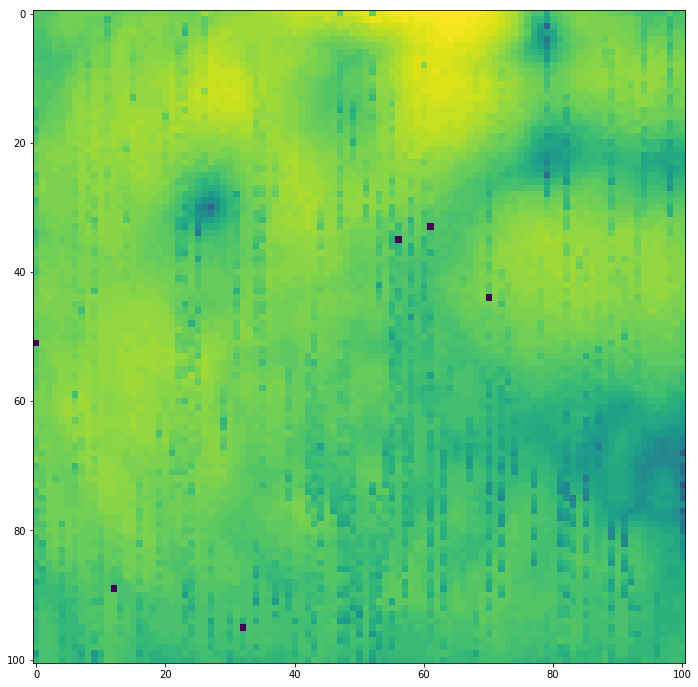

In [38]:
plt.figure(figsize=(12, 12))
plt.imshow(smoothed_image[39])

In [35]:
smoothed_image

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [31.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., 33., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [31.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., 33., ...,  0.,  0.,  0.]],

       [[39., 39., 41., ...,  0., 37., 37.],
        [40., 39., 41., ...,  0., 37., 36.],
        [40., 40., 41., ...,  0.,  0.,  0.],
        ...,
        [ 0., 38., 39., ..., 38., 38., 38.],
        [31., 37., 38., ...,  0.,  0., 37.],
        [ 0., 36., 38., ..., 38., 37., 37.]],

       ...,

       [[41., 41., 41., ..., 42., 39., 41.],
        [41., 41., 42., ..., 38., 41., 40.],
        [41., 41., 42., ..., 37., 41., 41.

In [102]:
data = get_data('../data/1551455546')

Found 3721 records


In [120]:
def visualize_frequency_scan(data_sample):
    x, y = get_maxes_and_freqs(data_sample)

    # Turn this into a dict and then find mean + error bars!
    datapts = {}
    for xpt, ypt in zip(x, y):
        if xpt not in datapts:
            datapts[xpt] = []
        datapts[xpt].append(ypt)

    x_plot, y_mean, y_err = [], [], []
    # Sort by increasing x
    for xpt, yvals in sorted(list(datapts.items())):
        yvals = np.array(yvals)
        x_plot.append(xpt)
        y_mean.append(yvals.mean())
        y_err.append(yvals.std())

    x_plot = np.array(x_plot)
    y_mean = np.array(y_mean)
    y_err = np.array(y_err)

    plt.figure(figsize=(8, 6))
    plt.errorbar(x_plot * 5 + 27950, y_mean, yerr=y_err, fmt='s', linestyle="dashed")
    plt.title("Frequency scan for a single point")
    plt.ylabel('Intensity at current point (mV)')
    plt.xlabel("Frequency (Hz)")
    plt.show()

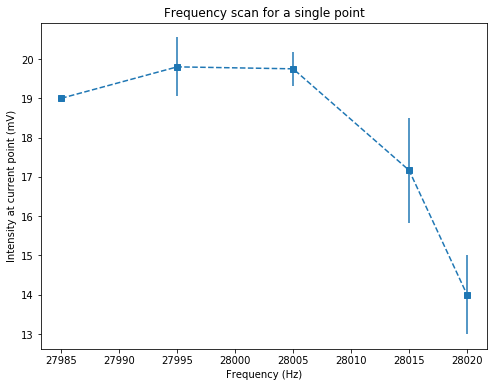

In [104]:
visualize_frequency_scan(data[22][-1])

In [105]:
WIDTH, HEIGHT = 61, 61
num_freqs = data[2][-1].shape[-1]
print(num_freqs)
image = np.zeros((num_freqs, WIDTH, HEIGHT))

for index, d in enumerate(data):
    idx, idy = int(index % WIDTH), int(index / WIDTH)
    freq_indices, max_amps = get_maxes_and_freqs(d[-1])
    image[freq_indices, idx, idy] = max_amps
    
nearby_smoothing = 1  # get data from 2 nearest and farthest
smoothed_image = np.array(image)
for idx, freq_slice in enumerate(image):
    start = np.clip(idx - nearby_smoothing, 0, image.shape[0] - 1)
    end = np.clip(idx + nearby_smoothing, 0, image.shape[0] - 1)
    smoothed_image[idx] = image[start:end].max(axis=0)

11


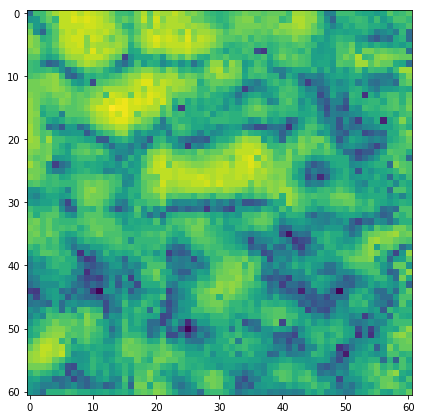

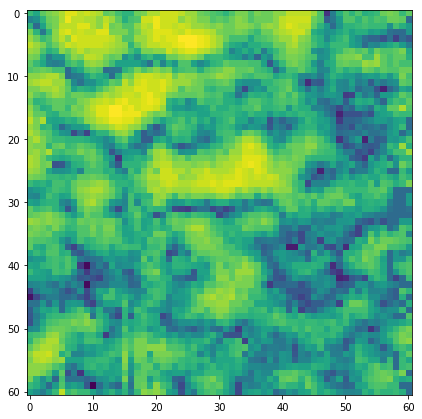

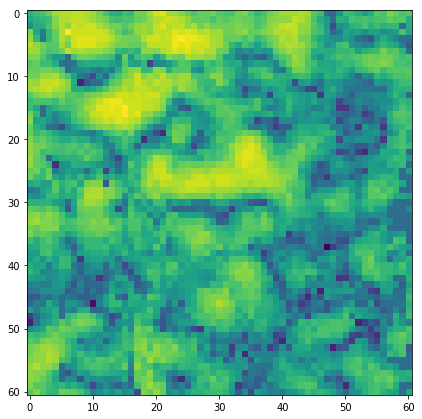

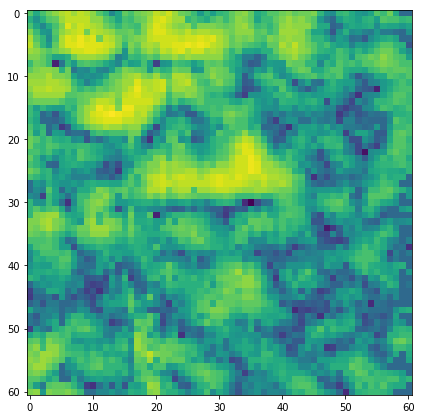

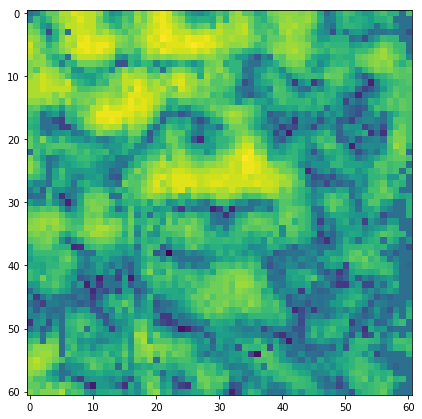

In [109]:
view = [2, 4, 6, 8, 10]

for idx, slce in enumerate(view):
    plt.figure(figsize=(8 * len(view), 8))
    plt.subplot(1, len(view), idx + 1)
    plt.imshow(image[slce])
    plt.show()

In [110]:
data = get_data('../data/1551485061')

Found 3721 records


In [111]:
WIDTH, HEIGHT = 61, 61
num_freqs = data[2][-1].shape[-1]
print(num_freqs)
image = np.zeros((num_freqs, WIDTH, HEIGHT))

for index, d in enumerate(data):
    idx, idy = int(index % WIDTH), int(index / WIDTH)
    freq_indices, max_amps = get_maxes_and_freqs(d[-1])
    image[freq_indices, idx, idy] = max_amps
    
nearby_smoothing = 1  # get data from 2 nearest and farthest
smoothed_image = np.array(image)
for idx, freq_slice in enumerate(image):
    start = np.clip(idx - nearby_smoothing, 0, image.shape[0] - 1)
    end = np.clip(idx + nearby_smoothing, 0, image.shape[0] - 1)
    smoothed_image[idx] = image[start:end].max(axis=0)

23


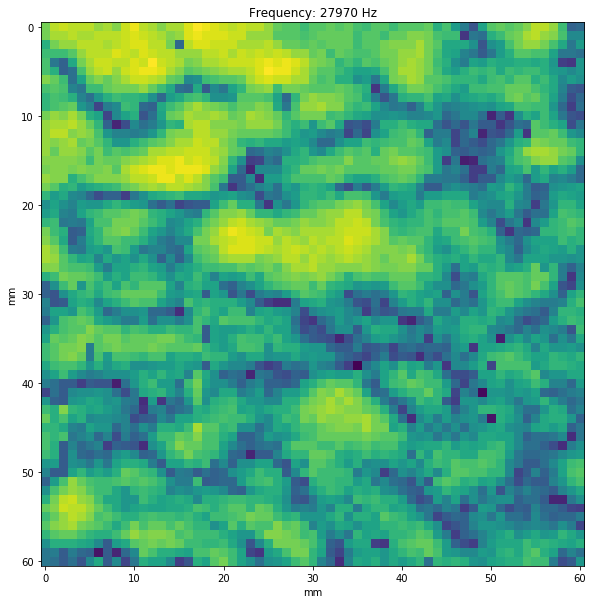

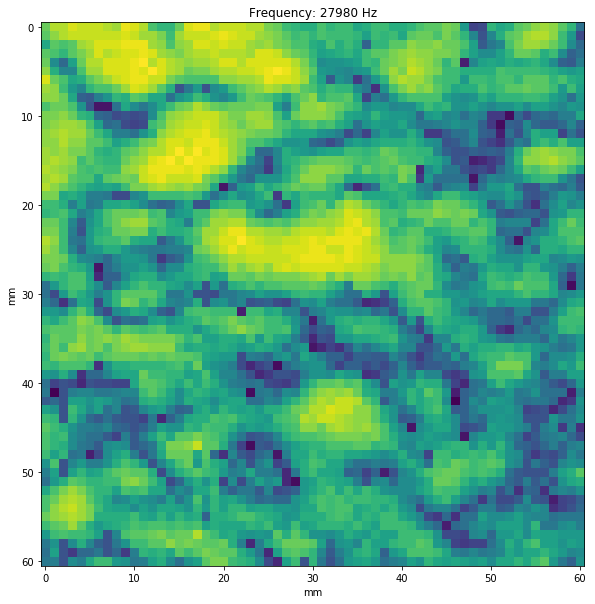

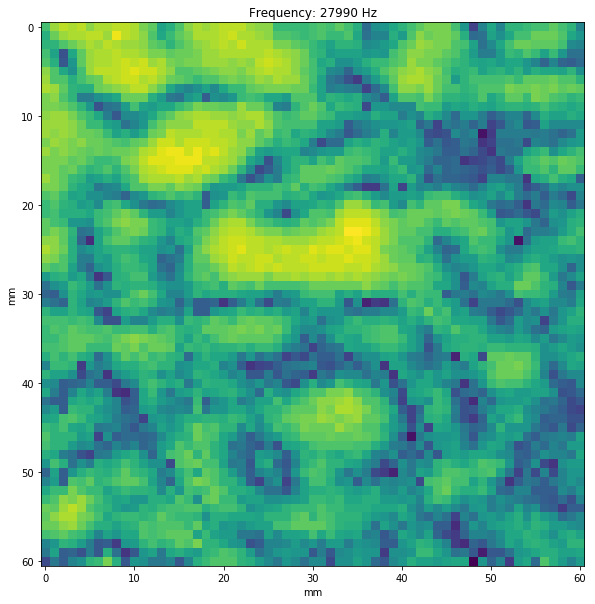

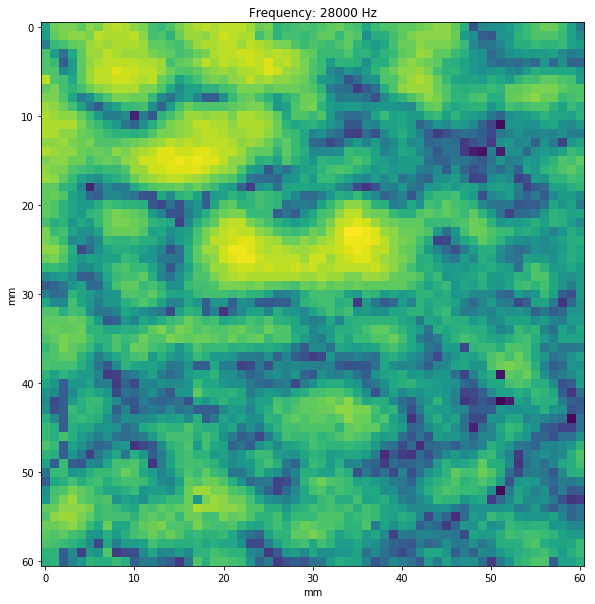

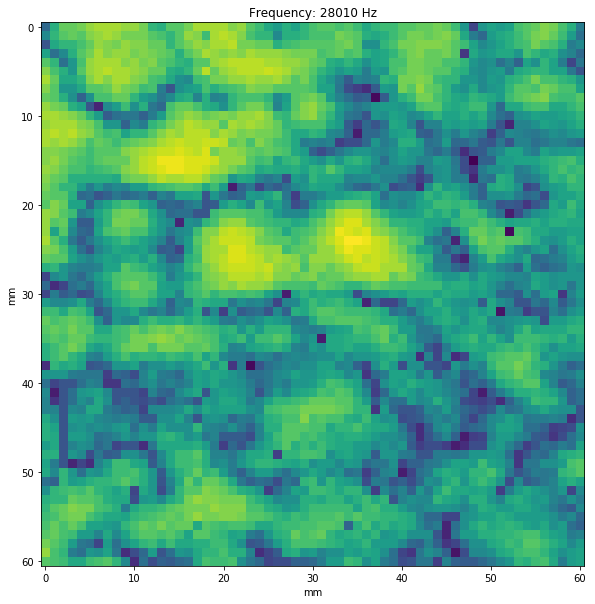

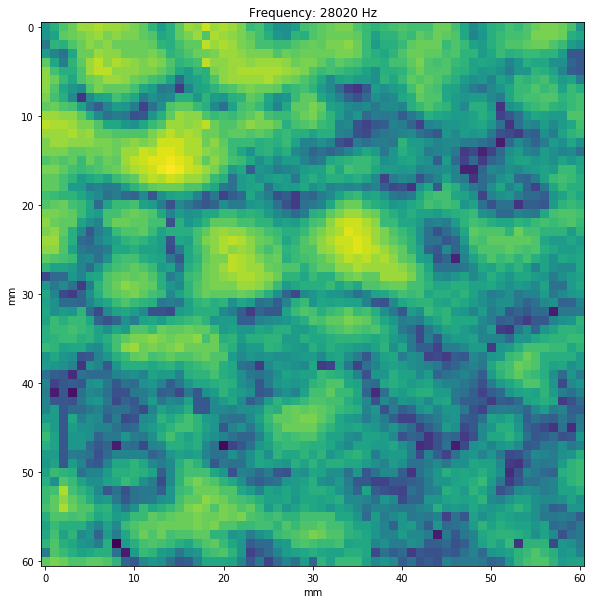

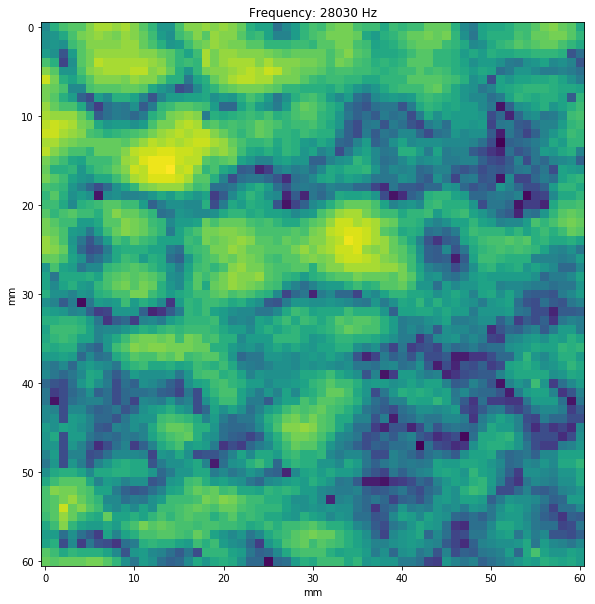

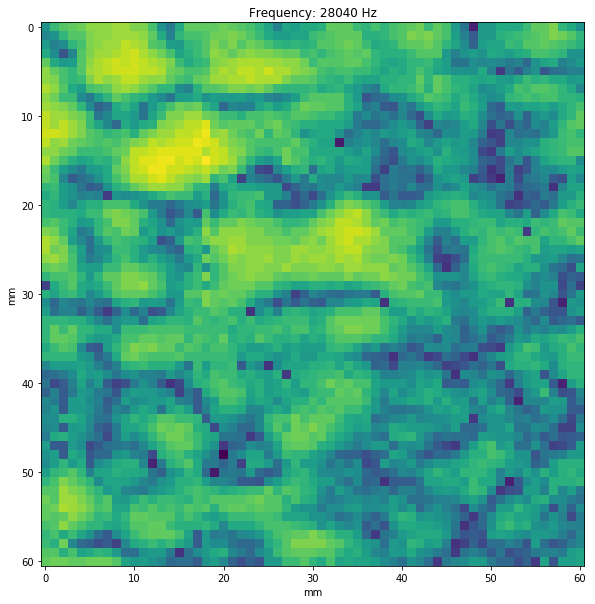

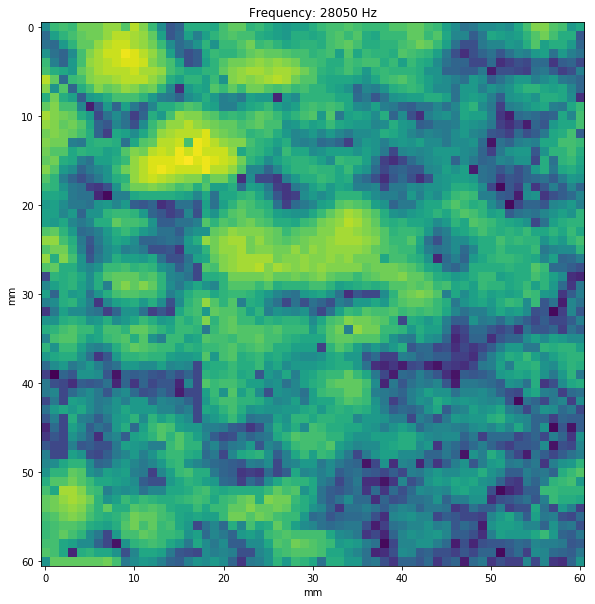

In [166]:
view = [4, 6, 8, 10, 12, 14, 16, 18, 20]

for idx, slce in enumerate(view):
    # plt.figure(figsize=(8 * len(view), 8))
    # plt.subplot(1, len(view), idx + 1)
    plt.figure(figsize=(10, 10))
    plt.ylabel('mm')
    plt.xlabel('mm')
    plt.title("Frequency: %d Hz" % int(slce * 5 + 27950))
    plt.imshow(image[slce])
    plt.savefig("/home/metamaterials/Documents/freqscans/sixtyscan{}.png".format(slce))

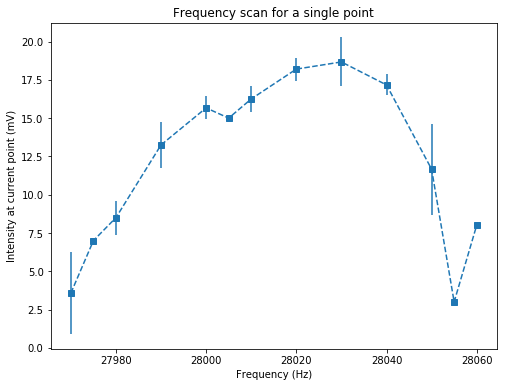

In [162]:
visualize_frequency_scan(data[2009][-1])

In [187]:
data = get_data('../data/1551746148')

Found 5 records


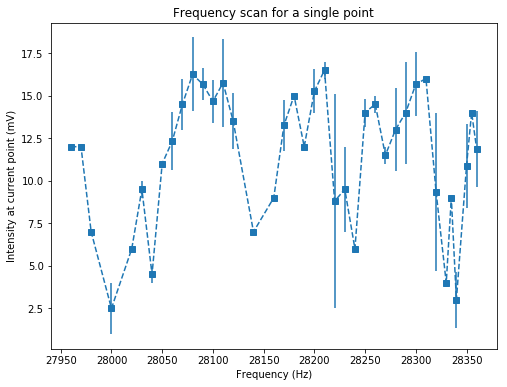

In [188]:
visualize_frequency_scan(data[4][-1])